## Preparing Environement

In [1]:
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
# add the 'src' directory as one where we can import modules
root_dir = os.path.join(os.getcwd(),os.pardir)
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
if src_dir not in sys.path: sys.path.append(src_dir)
    
import math
import copy as cp
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,Birch,AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn import preprocessing

from scipy.cluster import hierarchy
from scipy import stats
from scipy.stats import mstats

import helpers as hlp
%aimport helpers
from external import kMedoids
from IPython.display import display

#printing
pd.options.display.float_format = '{:,.2f}'.format


C:\Users\rahmim00\AppData\Local\Continuum\anaconda3\envs\dev_py34\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Load preprocessed data

In [12]:
raw_path = os.path.join(root_dir,"data\\raw\\")
interim_path = os.path.join(root_dir,"data\\interim\\") 
processed_path = os.path.join(root_dir,"data\\processed\\") 

reports_path = os.path.join(root_dir,"reports\\")
models_path = os.path.join(root_dir,"models\\")

raw_file_name ="bnd_product_p2_raw.csv"
clean_file_name = "bnd_product_p2_clean.csv"
z_file_name ="bnd_product_z_p2_clean.csv"

row_headers = ['Product']

product_raw_df = pd.read_csv(interim_path+raw_file_name, sep=';', encoding='utf-8')
product_df = pd.read_csv(interim_path+clean_file_name, sep=';', encoding='utf-8')
product_df_full = pd.read_csv(processed_path+z_file_name, sep=';', encoding='utf-8')

X_z = product_df_full.values[:,1:].astype(np.float64)



nb_col = X_z.shape[1]
X_pca = PCA(n_components = nb_col).fit_transform(X_z)

print(product_df_full.shape)
product_df_full.head()

(326, 356)


Product  2016-12-03 00:00:00  2016-12-04 00:00:00  \
0  GBA001BND060FS                -2.78                -2.78   
1  GBA001BND060SS                -1.85                -1.85   
2  GBA001BND160FS                 0.83                 0.70   
3  GBA001BND250FS                -3.72                -3.72   
4  GBA001BNR250FS                -0.91                -1.05   

   2016-12-05 00:00:00  2016-12-06 00:00:00  2016-12-07 00:00:00  \
0                -2.78                -2.78                -2.78   
1                -1.87                -1.87                -1.87   
2                 0.58                 0.48                 0.40   
3                -3.72                -3.72                -3.72   
4                -1.15                -1.19                -1.21   

   2016-12-08 00:00:00  2016-12-09 00:00:00  2016-12-10 00:00:00  \
0                -2.78                -2.78                -2.78   
1                -1.87                -1.87                -1.78   
2                 0.34                 0.31                 0.27   
3                -3.72                -3.72                -3.19   
4                -1.21                -1.21                -1.21   

   2016-12-11 00:00:00         ...           2017-11-13 00:00:00  \
0                -2.78         ...                         -1.24   
1                -1.60         ...                         -1.87   
2                 0.22         ...                         -0.60   
3                -2.66         ...                          1.76   
4                -1.21         ...                          1.95   

   2017-11-14 00:00:00  2017-11-15 00:00:00  2017-11-16 00:00:00  \
0                -1.63                -1.88                -2.06   
1                -2.03                -2.03                -2.03   
2                -0.70                -0.70                -0.76   
3                 1.76                 1.94                 1.76   
4                 1.91                 1.90                 1.82   

   2017-11-17 00:00:00  2017-11-18 00:00:00  2017-11-19 00:00:00  \
0                -2.13                -2.14                -2.09   
1                -2.03                -2.03                -2.03   
2                -0.60                -0.43                 0.07   
3                 1.58                 1.58                 1.58   
4                 1.73                 1.59                 1.53   

   2017-11-20 00:00:00  2017-11-21 00:00:00  2017-11-22 00:00:00  
0                -2.09                -2.09                -2.08  
1                -2.03                -2.03                -2.03  
2                 0.46                 0.93                 1.41  
3                 1.41                 1.41                 1.41  
4                 1.42                 1.25                 1.11  

[5 rows x 356 columns]

# 3. Modeling - Clustering Algorithms
Try out Hierarchical clustering, kMeans and kMedodis  on raw (cleaned) data. Then, plot the PCA to visualize the result of the clustering on the principal components

## Agglomerative - Automated Cut-Off Selection

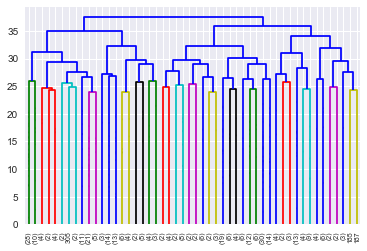

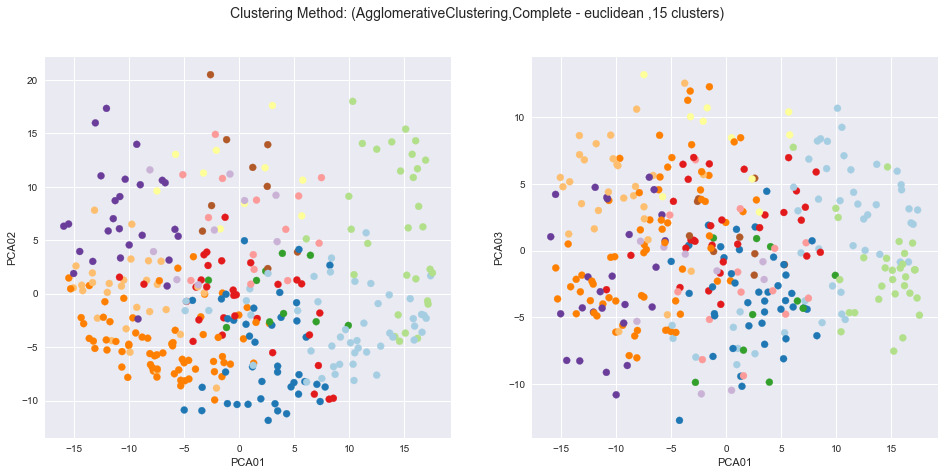

In [24]:
from scipy.cluster import hierarchy

SSE = {}
SILOUHAITE = {}

Z = hierarchy.linkage(X_z, method='complete',metric='euclidean')
dn = hierarchy.dendrogram(Z, truncate_mode='lastp', p=50, leaf_rotation=90., leaf_font_size=7., show_contracted=True)
plt.show()



plt.figure()
labels_h_cc = hierarchy.fcluster(Z, t=15 ,criterion = 'maxclust')
hlp.Clusters_plot(X= X_pca, labels = labels_h_cc,info=["AgglomerativeClustering","Complete - euclidean ","%d clusters"%len(set(labels_h_cc))])


SSE["Agg_complete"] = hlp.getSSE(X_z,X_z[labels_h_cc])

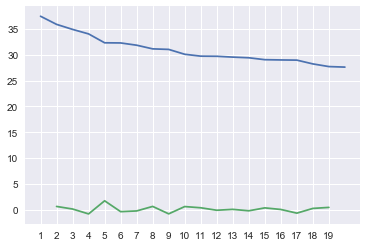

clusters: [ 5  4  9 17  8  2 10 19  6 11 15  7 14 18 12  3 13 16]


In [25]:
last = Z[-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.xticks(np.arange(1,len(last)))
plt.show()
best_ks = np.abs(acceleration_rev).argsort()[::-1]
k =  best_ks+ 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

### K-Means: Validate different numbers of clusters

clusters: [22 11  9 40 36 32 17 21 13 15 28 26 30 19 34 38 24  7]
clusters: [ 4  5 26 11  9  7 17 13 19 30 40 22 38 21 36 34 15 32 28 24]


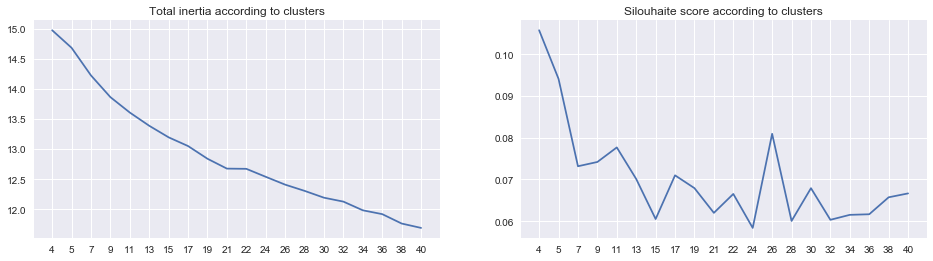

In [26]:
%matplotlib inline
clusters= np.linspace(4,40,20).astype(int)
inertia = []
silouhaite = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster).fit(X_z)
    silouhaite.append(hlp.getSilouhaite(X_z,kmeans.labels_))
    inertia += [np.sqrt(kmeans.inertia_/len(kmeans.labels_))]

plt.figure(figsize=(16,4))
    
plt.subplot(1,2,1)
inertia = np.array(inertia)
plt.title("Total inertia according to clusters")    
plt.plot(np.arange(0,len(clusters)),inertia)#scale it to acc2
plt.xticks(np.arange(0,len(clusters)),clusters)


acc = np.diff(inertia, 2)  # 2nd derivative of the inertia curve
#plt.plot(np.arange(2,len(clusters)), acc)
best_ks = acc.argsort()[::-1]
k =  best_ks+ 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:",clusters[k])



plt.subplot(1,2,2)
silouhaite = np.array(silouhaite)
plt.title("Silouhaite score according to clusters")    
plt.plot(np.arange(0,len(clusters)),silouhaite)#scale it to acc2
plt.xticks(np.arange(0,len(clusters)),clusters)
best_ks = silouhaite.argsort()[::-1]
print("clusters:",clusters[best_ks])


plt.show()


## Ward Clustering

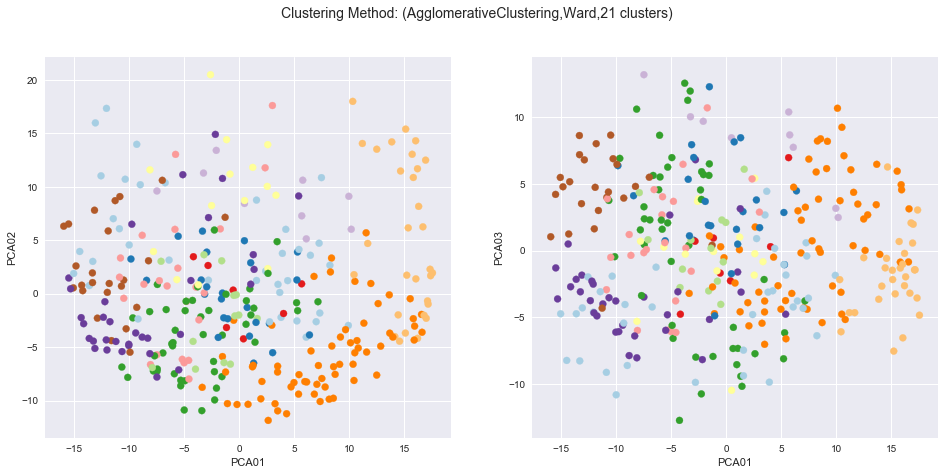

In [29]:
n_cluster = 21

from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=n_cluster, linkage='ward').fit(X_z)
label = ward.labels_

SSE['Ward'] = hlp.getSSE(X_z,X_z[label])
hlp.Clusters_plot(X= X_pca, labels = label,info=["AgglomerativeClustering","Ward","%d clusters"%len(set(label))])

## K-means

In [30]:
%matplotlib inline

kmeans = KMeans(n_clusters=n_cluster).fit(X_z)
label = kmeans.labels_
labels_kmeans = label

SSE["kMeans"] = hlp.getSSE(X_z,X_z[labels_kmeans])

### PCA representation of the clustering

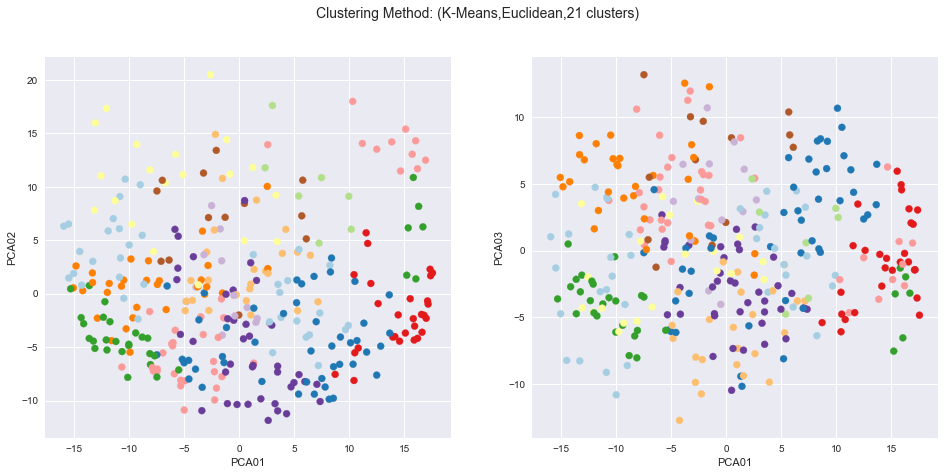

In [31]:
X = X_pca[:,:3]
hlp.Clusters_plot(X= X_pca, labels = label,info=["K-Means","Euclidean","%d clusters"%len(set(label))])

### TSNE representation of the clustering

## Custom Distances

In [32]:
from scipy.stats import spearmanr
def spearmanr_dist(x,y):
    rho, pval = spearmanr(x,y)
    return rho


r,p = spearmanr(X_z)
np.fill_diagonal(r,0)

In [33]:
from external import kMedoids
from scipy.spatial.distance import pdist,squareform

n_obs = X_z.shape[1]
corr_distance = squareform(pdist(X_z, 'correlation'))
euclid_distance = squareform(pdist(X_z, 'euclidean'))
sqcorr_distance = corr_distance**2
#spearman_distance = squareform(pdist(X_z, lambda u, v: spearmanr_dist(u,v)))

## K-medoid: validate number of clusters using silouhaite

[ 5  4  7  9 15 17 11 32 19 22 13 38 21 28 26 34 36 30 40 24]


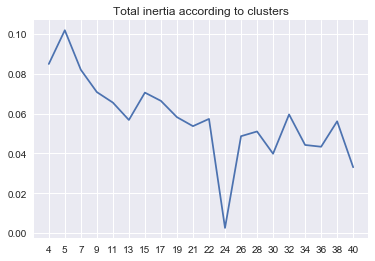

In [34]:
%matplotlib inline
clusters= np.linspace(4,40,20).astype(int)
silouhaite = []
for cluster in clusters:
    labels, medoids = kMedoids.cluster(euclid_distance,k= cluster)
    silouhaite.append(hlp.getSilouhaite(X_z,labels))
    
silouhaite = np.array(silouhaite)
plt.title("Total inertia according to clusters")    
plt.plot(np.arange(0,len(clusters)),silouhaite)#scale it to acc2
plt.xticks(np.arange(0,len(clusters)),clusters)
best_ks = silouhaite.argsort()[::-1]
print(clusters[best_ks])
plt.show()

## K-medoids (Correlation distance)

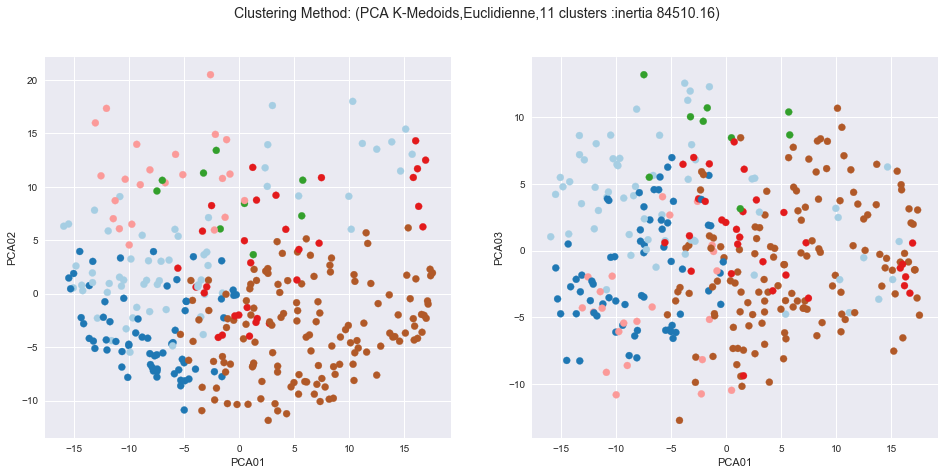

In [35]:
n_cluster = 11
label, medoids_euc = kMedoids.cluster(euclid_distance,k= n_cluster)
labels_kmedoids = label

labels_kmedoids_corr,medoids_corr = kMedoids.cluster(corr_distance,k= n_cluster)
labels_kmedoids_spear,medoids_spear = kMedoids.cluster(corr_distance,k= n_cluster)


SSE["kMedoids"] = hlp.getSSE(X_z,X_z[labels_kmedoids])
SSE["kMedoids_corr"] = hlp.getSSE(X_z,X_z[labels_kmedoids_corr])
SSE["kMedoids_spear"] = hlp.getSSE(X_z,X_z[labels_kmedoids_spear])


SILOUHAITE["kMedoids"] = hlp.getSilouhaite(X_z,labels_kmedoids)
SILOUHAITE["kMedoids_corr"] = hlp.getSilouhaite(X_z,labels_kmedoids_corr)
SILOUHAITE["kMedoids_spear"] = hlp.getSilouhaite(X_z,labels_kmedoids_spear)


hlp.Clusters_plot(X= X_pca, labels = label
                  ,info=["PCA K-Medoids","Euclidienne","%d clusters :inertia %.2f"%(len(set(label)),SSE["kMedoids"])])
#hlp.Clusters_plot(X= X_tsne, labels = label,info=["TSNE K-Medoids","Correlation","%d clusters"%len(set(label))])

## Clustering methods Metrics

In [36]:
for k,v in SSE.items():
    print(" \"%s\" : %.2f"%(k,v))

print()
    
for k,v in SILOUHAITE.items():
    print(" \"%s\" : %.2f"%(k,v))

 "kMedoids_corr" : 87466.88
 "kMedoids_spear" : 86186.85
 "Ward" : 198802.01
 "kMedoids" : 84510.16
 "Agg_complete" : 226005.68
 "kMeans" : 202566.08

 "kMedoids_corr" : 0.08
 "kMedoids" : 0.07
 "kMedoids_spear" : 0.06


# Save Clustering Results

In [42]:
processed_path = "..\\data\\processed\\"
file_name = "p2c1_clustering_p2_clean.csv"

version = 1

file_name = "p2_clustering_clean_jour_v%d.csv"%version
models_path = "..\\models\\"

def labels_to_df(labels):
    medoid_cluster_dict = dict()
    
    medoids = list(set(labels))
    for i,l in enumerate(medoids):
        medoid_cluster_dict[l] = i+1

    pd_tuples_list = list(product_df_full[row_headers].itertuples(index=False))
    headers_list = [tuple(x) for x in pd_tuples_list]
    
    rows=[]
    for i,h in enumerate(headers_list):
        m = labels[i]
        rows.append([h[0],medoid_cluster_dict[m],"%s"%(h[0] if len(headers_list)>1 else   (headers_list[m],) )])


    label_df = pd.DataFrame(rows,columns = row_headers + ["Cluster","Centroid"])
    return label_df




eucl_df = labels_to_df(labels_kmedoids)
corr_df = labels_to_df(labels_kmedoids_corr)
spear_df = labels_to_df(labels_kmedoids_spear)


eucl_df.to_csv(models_path+"euc_"+file_name, sep=';', encoding='utf-8')
corr_df.to_csv(models_path+"corr_"+file_name, sep=';', encoding='utf-8')
spear_df.to_csv(models_path+"spear_"+file_name, sep=';', encoding='utf-8')

In [43]:
print(eucl_df[eucl_df["Cluster"]==8].shape)
eucl_df[eucl_df["Cluster"]==8].sort_values(by=["Product"])

(23, 3)


Product  Cluster        Centroid
3    GBA001BND250FS        8  GBA001BND250FS
4    GBA001BNR250FS        8  GBA001BNR250FS
72   GCO002NEU250FS        8  GCO002NEU250FS
100  GEP006PQC500FS        8  GEP006PQC500FS
108  GKP001SPV200FS        8  GKP001SPV200FS
109  GKP002BNR1K0FS        8  GKP002BNR1K0FS
124  GLI002CAE200FS        8  GLI002CAE200FS
126  GLI002CQT250FS        8  GLI002CQT250FS
129  GLI002ESE200FS        8  GLI002ESE200FS
130  GLI002FTG200FS        8  GLI002FTG200FS
137  GLI004MCD1K0FS        8  GLI004MCD1K0FS
138  GLI004NEU1K0FS        8  GLI004NEU1K0FS
141  GLO002NEU250FS        8  GLO002NEU250FS
147  GLV001CAE090FS        8  GLV001CAE090FS
149  GLV001CQT125FS        8  GLV001CQT125FS
152  GLV001FTG100FS        8  GLV001FTG100FS
205  GWC028JLG200FS        8  GWC028JLG200FS
235  GWJ008SCV150FS        8  GWJ008SCV150FS
268  GWK006ESE200FS        8  GWK006ESE200FS
273  GWM001JLG200FS        8  GWM001JLG200FS
295  GWQ002SCV200FS        8  GWQ002SCV200FS
303  GWT031ESE250BQ        8  GWT031ESE250BQ
311  GYD017NEU2K0FS        8  GYD017NEU2K0FS

# Display Clustering Results

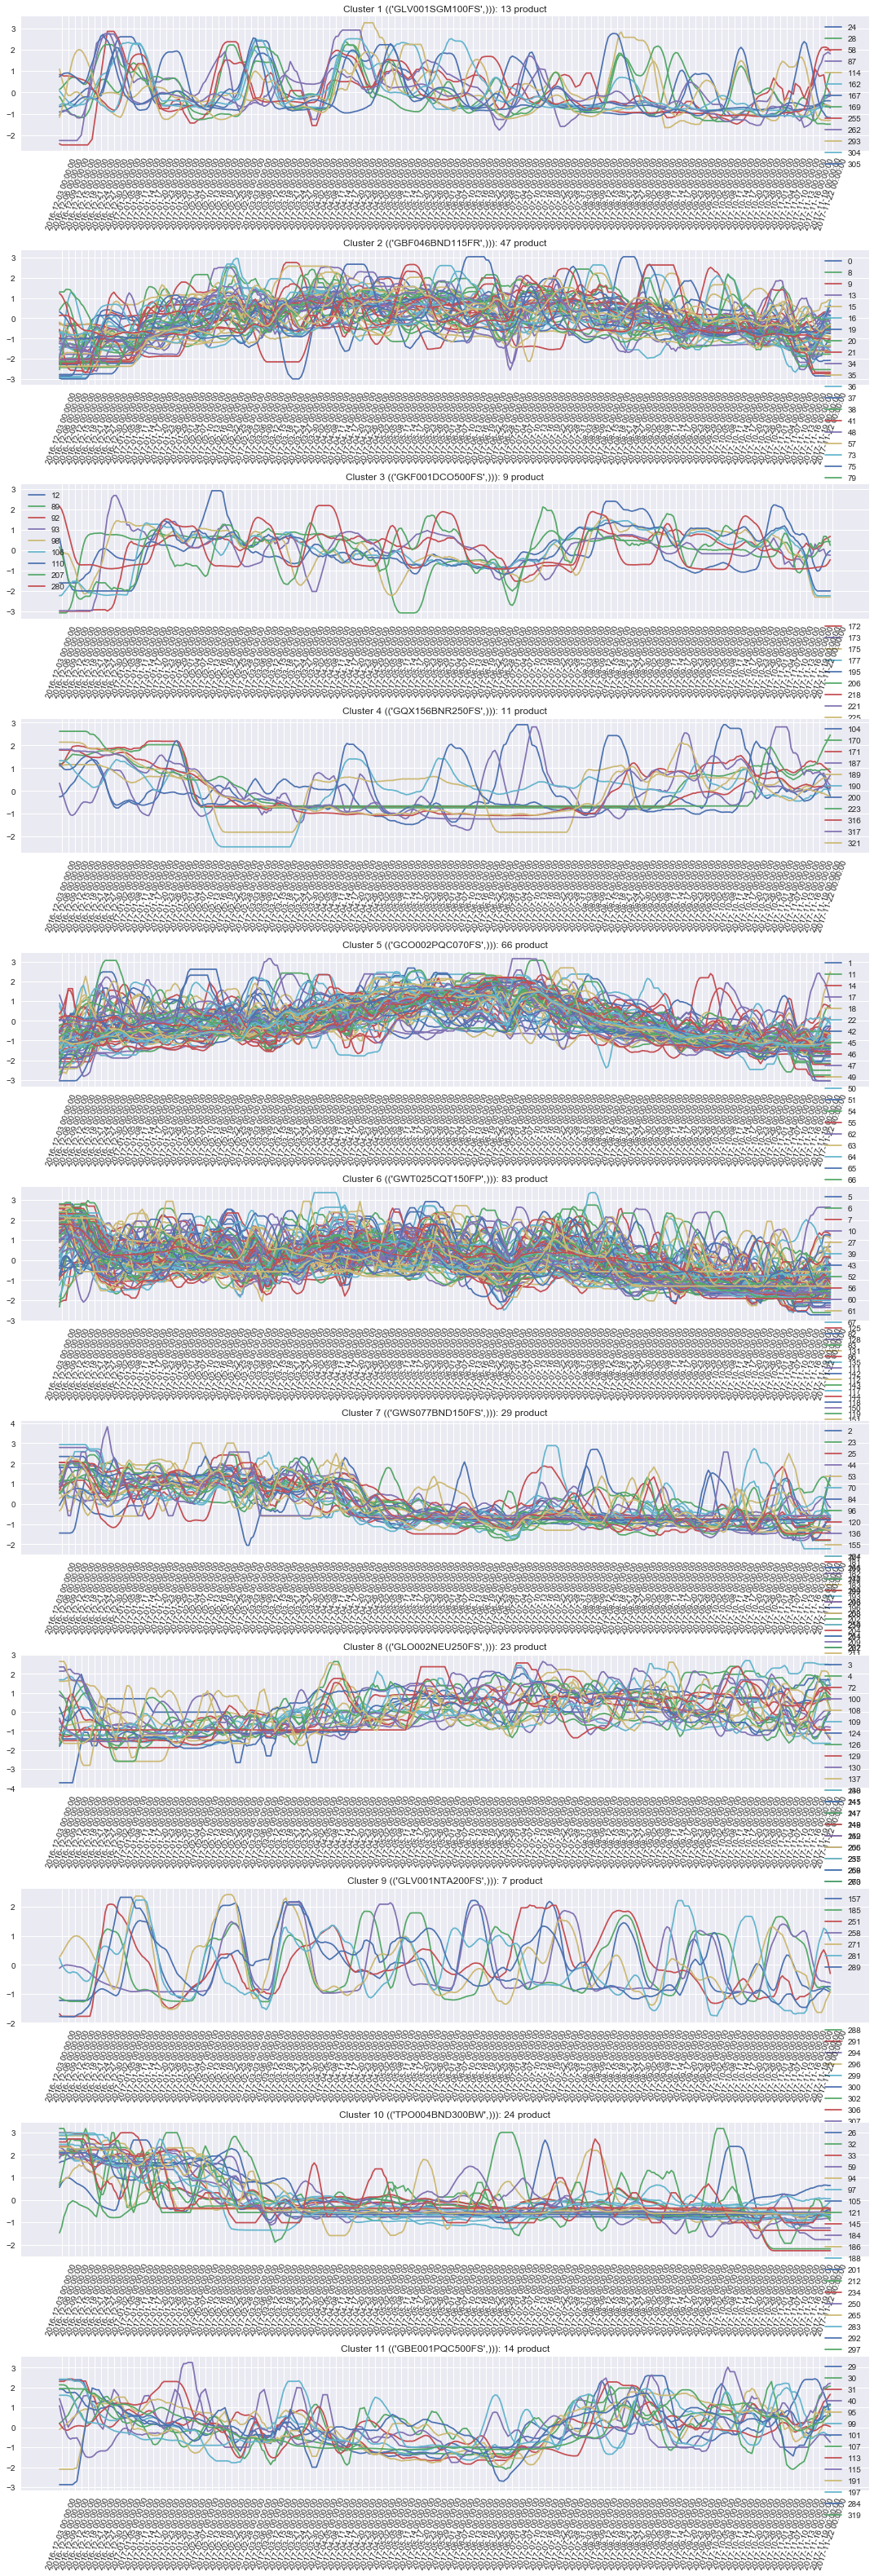

In [38]:
carr = hlp.Cluster_series_plot(data_df = product_df_full, cluster_df = eucl_df)

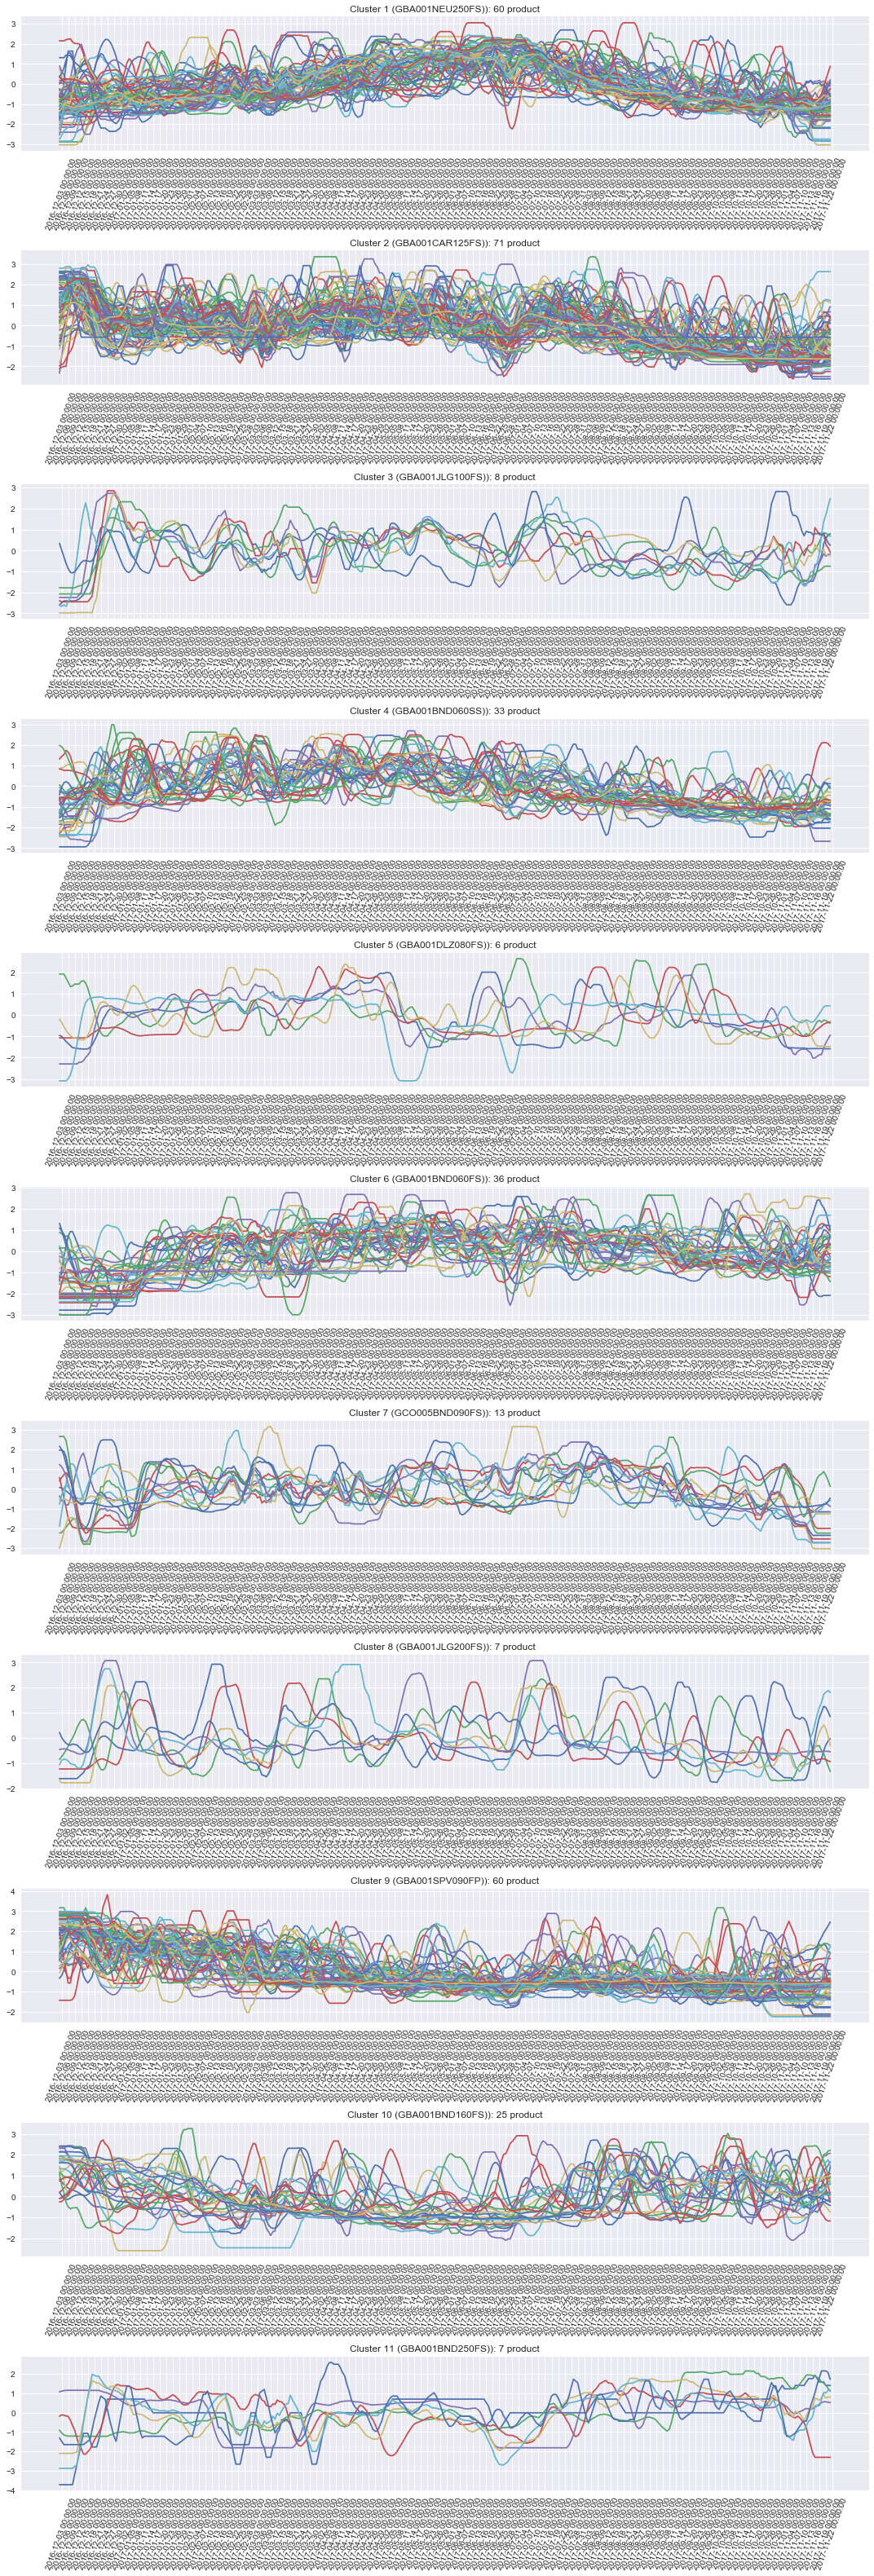

In [45]:
carr = hlp.Cluster_series_plot(data_df = product_df_full, cluster_df = corr_df)

In [ ]:
carr = hlp.Cluster_series_plot(data_df = product_df_full, cluster_df = spear_df)

In [ ]:
########################################################################################################################

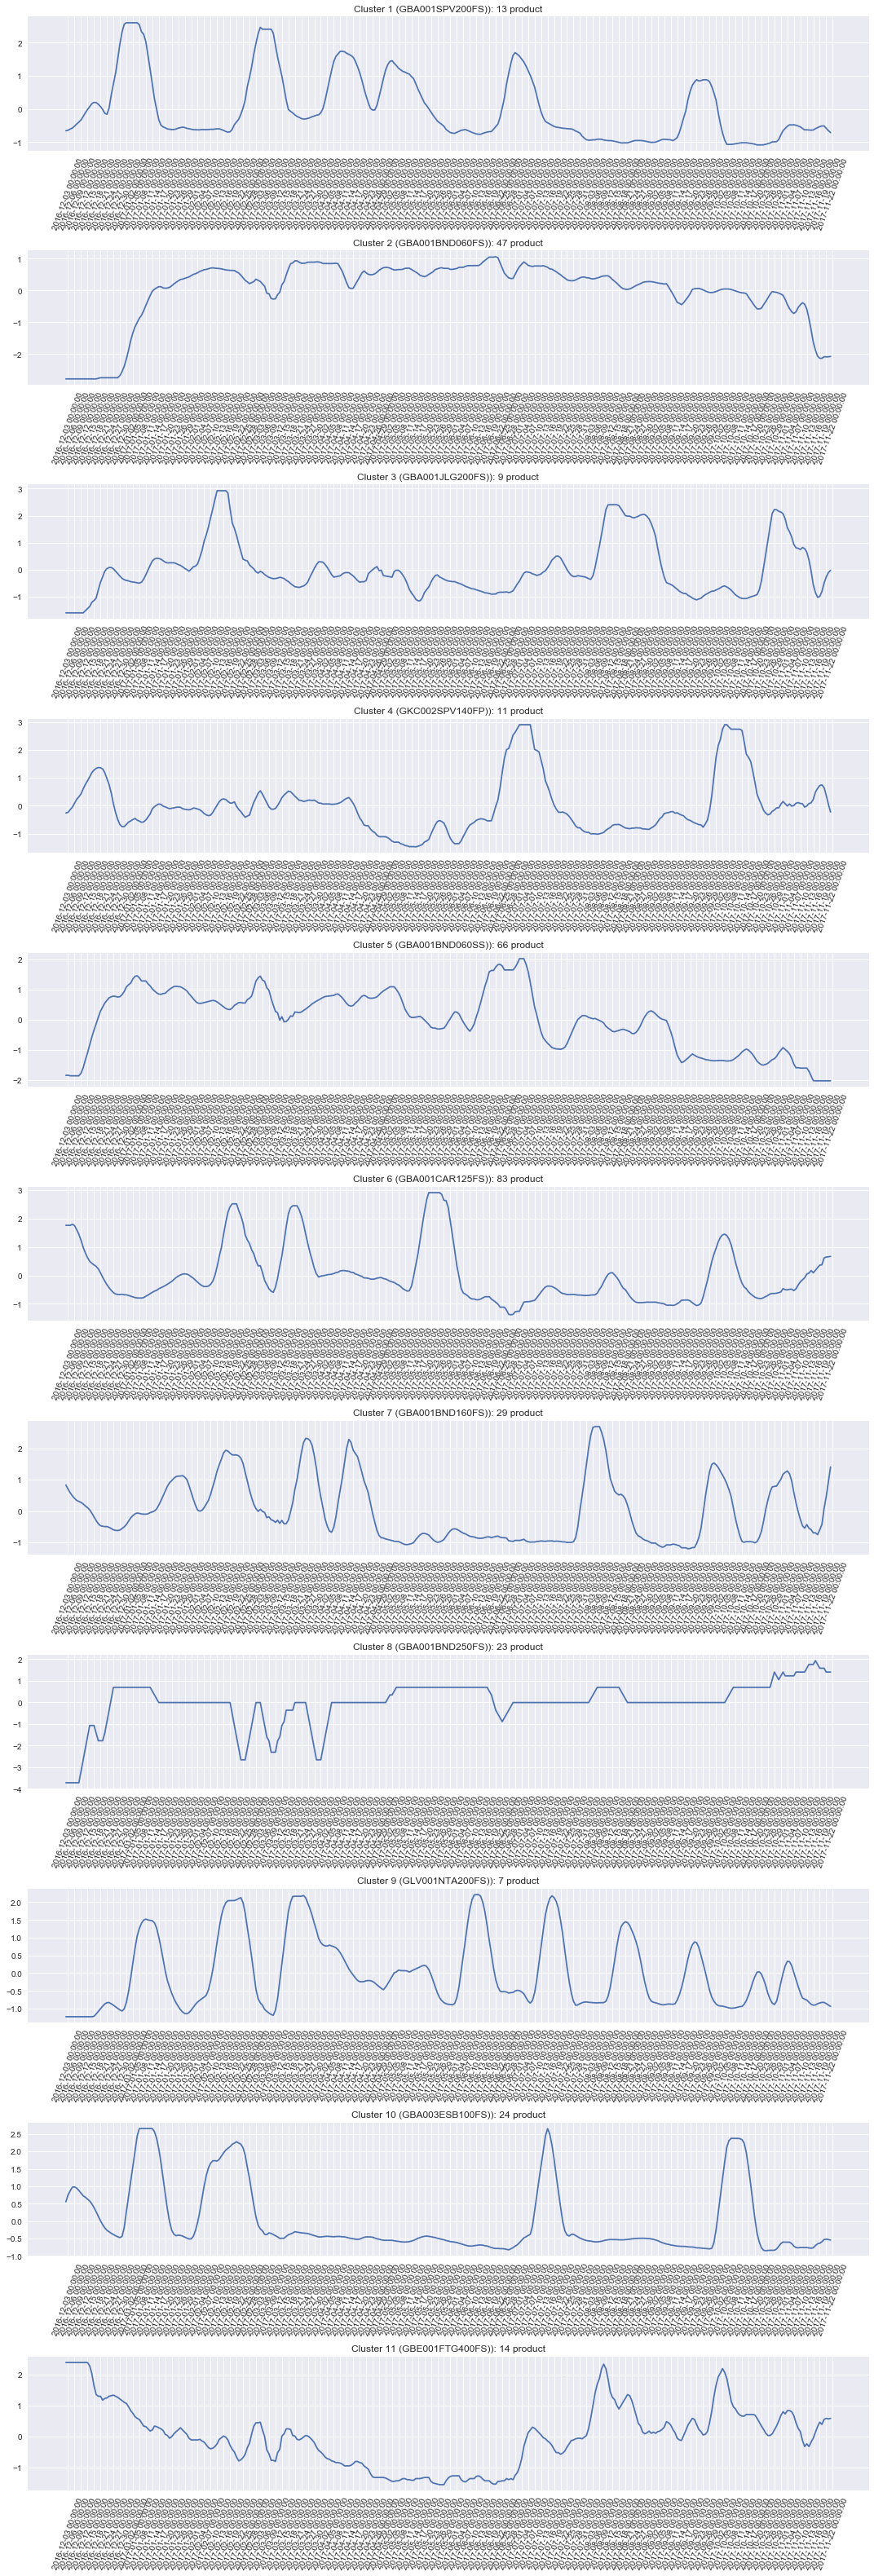

In [44]:
carr = hlp.Cluster_series_plot(data_df = product_df_full, cluster_df = eucl_df,centroid_only = True)

########################################################################################################################

# Other Methods

## BIRCH Algorithm

In [ ]:
label = Birch(n_clusters= n_cluster, threshold=0.5, compute_labels=True).fit_predict(X_z)
labels_birch = label

SSE["Birch"] = hlp.getSSE(X_z,X_z[labels_birch])

hlp.Clusters_plot(X= X_pca, labels = label,info=["PCA BIRCH","(50, 0.5)","%d clusters"%len(set(label))])

# SOM

In [251]:
import sompy
mapsize = [30,30]

n_cluster = 21

som = sompy.SOMFactory().build(X_z, mapsize, mask=None, mapshape='rectangular', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  

som.train(n_job=1,train_rough_len=10, train_finetune_len=20,verbose=None)  
topographic_error  = som.calculate_topographic_error()
quantization_error = np.mean(som._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))
som_labels = som.cluster(n_cluster)+1

maxtrainlen %d inf
maxtrainlen %d inf
Topographic error = 0.0950920245399; Quantization error = 7.34256978829


In [ ]:
from sompy.visualization.bmuhits import BmuHitsView
vhts  = BmuHitsView(4,4,"Hits Map",text_size=12)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

In [241]:
bmus = som.project_data(X_z)

pkeys = product_df_full["Product"].values
referents = som_labels[bmus]

som_df =pd.DataFrame(np.vstack((pkeys,referents,pkeys[referents])).T,columns=["Product","Cluster","Centroid"]).set_index('Product')

raw_path = "..\\data\\raw\\"
file_name = "bnd_products_desc.csv"

non_unique_features=["Key","Description","Unit of Measure 2 Ratio","Unit of Measure 4 Ratio","CONFEZIONE",\
                           "CONFEZIONE (Description)","IMBALLO","STD/PROMO","IMBALLO (Description)","STD/PROMO (Description)",\
                          "TIPO ARTICOLO","TIPO ARTICOLO (Description)"]

code_features = ["FAM DETTAGLIATA","FAM AGGREGATA","MARCHIO","GRUPPO MARCHIO","PACKAGING","SOTTO-TECNO",\
                           "PRODOTTO","CANALE DISTRIB","CLASSE COGE","FAM MARKETING","BIOLOGICO","GRUPPO MARCA COGE"]

unbalanced = ["Product Group key6","CANALE DISTRIB (Description)","CLASSE COGE (Description)","BIOLOGICO (Description)"]

df_produit = pd.read_csv(raw_path+file_name, sep=';', encoding='iso8859_2')\
                    .drop(non_unique_features,axis=1)\
                    .drop(code_features,axis=1)\
                    .drop_duplicates()\
                    .dropna()

#Join with clusters
product_cluster = df_produit.join(som_df,on='Product Group key',how='inner')
print(product_cluster.shape)
product_cluster.head()



(319, 20)


Product Group key Product Group key2 Product Group key3 Product Group key4  \
2     GLA006BND100FS       FRABNDASTELA         FRABNDASTE             FRABND   
63    GBA001BND060FS       FRABNDBOUQBA         FRABNDBOUQ             FRABND   
64    GBA001BND060SS       FRABNDBOUQBA         FRABNDBOUQ             FRABND   
79    GBA001BND160FS       FRABNDBOUQBA         FRABNDBOUQ             FRABND   
90    GBA001BND250FS       FRABNDBOUQBA         FRABNDBOUQ             FRABND   

   Product Group key5 Product Group key6 FAM DETTAGLIATA (Description)  \
2               FRA01                FRA                        LAITUE   
63              FRA01                FRA                      MACHE 4G   
64              FRA01                FRA                      MACHE 4G   
79              FRA01                FRA                      MACHE 4G   
90              FRA01                FRA                      MACHE 4G   

   FAM AGGREGATA (Description) MARCHIO (Description)  \
2                      ASTERIX             BONDUELLE   
63                    BOUQUETS             BONDUELLE   
64                    BOUQUETS             BONDUELLE   
79                    BOUQUETS             BONDUELLE   
90                    BOUQUETS             BONDUELLE   

   GRUPPO MARCHIO (Description)         PACKAGING (Description)  \
2                     BONDUELLE  0100                       N/A   
63                    BONDUELLE  0060                       N/A   
64                    BONDUELLE  0060                       N/A   
79                    BONDUELLE  0160                       N/A   
90                    BONDUELLE  0250                       N/A   

   SOTTO-TECNO (Description) PRODOTTO (Description)  \
2                    SALADES      MINI LAITUE VERTE   
63                   SALADES                  MACHE   
64                   SALADES                  MACHE   
79                   SALADES                  MACHE   
90                   SALADES                  MACHE   

   CANALE DISTRIB (Description) CLASSE COGE (Description)  \
2                   ARTICLES GP                PFC+ Frais   
63                  ARTICLES GP                PFC+ Frais   
64                  ARTICLES GP                PFC+ Frais   
79                  ARTICLES GP                PFC+ Frais   
90                  ARTICLES GP                PFC+ Frais   

   FAM MARKETING (Description) BIOLOGICO (Description)  \
2              M'AMA NON M'AMA                      NO   
63         JEUNES POUSSES MONO                      NO   
64         JEUNES POUSSES MONO                      NO   
79         JEUNES POUSSES MONO                      NO   
90         JEUNES POUSSES MONO                      NO   

   GRUPPO MARCA COGE (Description) Cluster        Centroid  
2                              BND       5  GBA001CAR125FS  
63                             BND       3  GBA001BND250FS  
64                             BND      13  GBA001NEU250FS  
79                             BND      15  GBA001NTA200FS  
90                             BND       6  GBA001CAR200FS

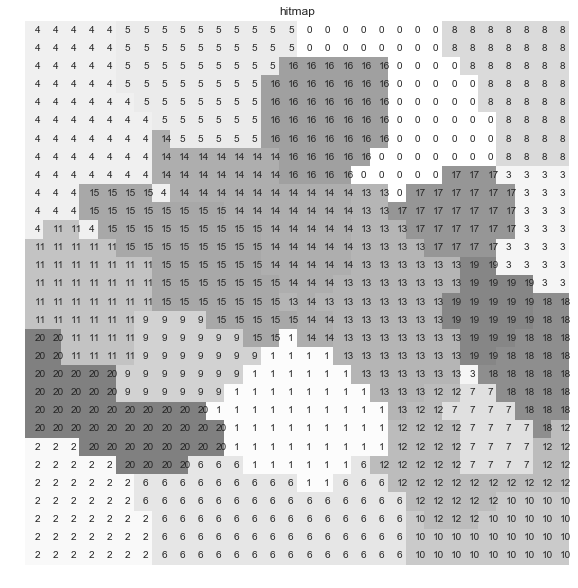

In [257]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

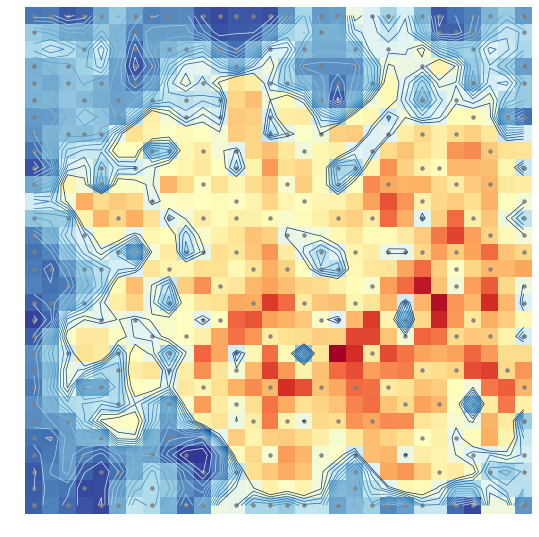

In [169]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

# Fuzzy c-means

In [ ]:
import skfuzzy as fuzz

ncenters = n_cluster
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_z.T, ncenters, 2, error=0.005, maxiter=1000, init=None)



labels_fuzzy = np.argmax(u, axis=0)

## Representation methods
### PAA_SAX representation

In [ ]:
from pyts.transformation import PAA,SAX
from pyts.visualization import plot_paa, plot_sax
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
ts = X_z[0].reshape(1,-1)

paa_win = 100
sax_bin = 30


#PAA example
paa = PAA(window_size=None, output_size=paa_win, overlapping=True)
X_paa = paa.transform(ts)
plot_paa(ts[0], window_size=None, output_size=paa_win, overlapping=True, marker='o')

#SAX example
sax = SAX(n_bins=sax_bin, quantiles='gaussian')
X_sax = sax.transform(X_paa)
plot_sax(X_paa[0], n_bins=sax_bin, quantiles='gaussian')
plt.show()

#Extract SAX vector
X_SAX= []
for x in X_z:
    ts = x.reshape(1,-1)
    paa = PAA(window_size=None, output_size=paa_win, overlapping=True)
    X_paa = paa.transform(ts)
    sax = SAX(n_bins=sax_bin, quantiles='gaussian')
    X_sax = sax.transform(X_paa)[0]
    X_SAX.append(list(X_sax))

#Cast back to int
X_SAX = np.array(X_SAX).astype('|S1')
X_SAX = X_SAX.view(np.uint8) - 98
# X_z = X_SAX
# N,M  = X_z.shape
